# Loading data

In [ ]:
# -> Start from loading Nigeria data into memory 

In [1]:
import pandas as pd
import numpy as np
import geopandas as gpd
from geopandas import GeoDataFrame
from shapely.geometry import LineString, Point
import matplotlib.pyplot as plt
import contextily
import os

In [ ]:
path = "GTDdownload/"

print(os.listdir(path))

In [ ]:
def loadGTD(filename):
    link = 'GTDdownload/'+filename
    file = pd.read_excel(link)
    return file

In [ ]:
# loading complete dataset to memory (can take a while)
data = loadGTD("globalterrorismdb_0718dist.xlsx")

# Some descriptive analysis

In [ ]:
data.head()

In [ ]:
# subsetting worldwide dataset by countryname

def subsetGTDbyCountry(data, countryname):
    GTDcountry = data[data.country_txt == countryname]
    return GTDcountry

In [ ]:
GTDNigeria = subsetGTDbyCountry(data, "Nigeria")

In [ ]:
GTDNigeria.head()

In [ ]:
GTDNigeria.keys()

In [ ]:
GTDNigeria.shape

# Saving (loading) Nigeria data to (from) disk

In [ ]:
def saveGTDdata(data, countryname):
    # save data by countryname
    data.to_csv("GTDdownload/"+countryname+".csv")

In [ ]:
saveGTDdata(GTDNigeria, "Nigeria")
# reduced filesize to approx. 5 MB

In [2]:
def loadGTDdata(countryname):
    # load data by countryname
    data = pd.read_csv("GTDdownload/"+countryname+".csv")
    return data

In [3]:
GTDNigeria = loadGTDdata("Nigeria")

# Plots

In [4]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
fig_size = plt.rcParams["figure.figsize"]
fig_size[0] = 12
fig_size[1] = 8
plt.rcParams["figure.figsize"] = fig_size

In [5]:
toplot = GTDNigeria.gname.value_counts()

In [6]:
toplot.head()

Boko Haram                                                 2087
Unknown                                                    1045
Fulani extremists                                           498
Movement for the Emancipation of the Niger Delta (MEND)      85
Niger Delta Avengers (NDA)                                   50
Name: gname, dtype: int64

In [7]:
# Taking only the groups with 50 or more attacks since 1970
toplot = toplot[toplot >= 50]

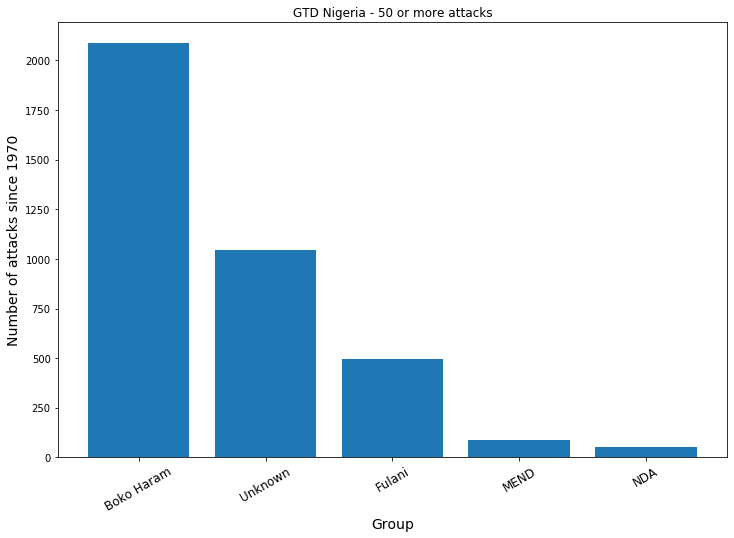

In [8]:
index = np.arange(len(toplot))
plt.bar(index, toplot)
plt.xlabel('Group', fontsize=14)
plt.ylabel('Number of attacks since 1970', fontsize=14)
plt.xticks(index, ["Boko Haram", "Unknown", "Fulani", "MEND", "NDA"], fontsize=12, rotation=30)
plt.title('GTD Nigeria - 50 or more attacks')
plt.show()

# Maps

In [9]:
# subset by Group

def subsetGTDbyGroup(data, groupname):
    GTDgroup = data[data.gname == groupname]
    return GTDgroup

In [10]:
GTDNigeriaBokoHaram = subsetGTDbyGroup(GTDNigeria, "Boko Haram")

In [11]:
GTDNigeriaBokoHaram.head()

,Unnamed: 0,Unnamed: 0.1,eventid,iyear,imonth,iday,approxdate,extended,resolution,country,...,addnotes,scite1,scite2,scite3,dbsource,INT_LOG,INT_IDEO,INT_MISC,INT_ANY,related
326,326,92956,200907270015,2009,7,27,NaN,0,NaN,147,...,NaN,"Ibrahim Mshelizza, ""Hundreds Of Bodies in Stre...","Press TV, ""Fierce Clashes Continue in Nigeria,...","Jane's Intelligence, ""Islamist Militants Attac...",ISVG,0,0,0,0,"200907270015, 200907270030, 200907270031"
327,327,92957,200907270016,2009,7,27,NaN,0,NaN,147,...,This was one of four related attacks (cf. 2009...,"Ibrahim Mshelizza, ""Hundreds Of Bodies in Stre...","Press TV, ""Fierce Clashes Continue in Nigeria,...","Jane's Intelligence, ""Islamist Militants Attac...",ISVG,0,0,0,0,"200907270016, 200907270027, 200907270028, 2009..."
328,328,92958,200907270017,2009,7,27,NaN,0,NaN,147,...,This was one of three related attacks (cf. 200...,"Ibrahim Mshelizza, ""Hundreds Of Bodies in Stre...","Press TV, ""Fierce Clashes Continue in Nigeria,...","Jane's Intelligence, ""Islamist Militants Attac...",ISVG,0,0,0,0,"200907270017, 200907270025, 200907270026"
329,329,92962,200907270025,2009,7,27,NaN,0,NaN,147,...,This is one of three related attacks (cf. 2009...,"Ibrahim Mshelizza, ""Hundreds Of Bodies in Stre...","Press TV, ""Fierce Clashes Continue in Nigeria,...","Jane's Intelligence, ""Islamist Militants Attac...",ISVG,0,0,0,0,"200907270025, 200907270017, 200907270026"
330,330,92963,200907270026,2009,7,27,NaN,0,NaN,147,...,This was one of three related attacks (cf. 200...,"Ibrahim Mshelizza, ""Hundreds Of Bodies in Stre...","Press TV, ""Fierce Clashes Continue in Nigeria,...","Jane's Intelligence, ""Islamist Militants Attac...",ISVG,0,0,0,0,"200907270026, 200907270017, 200907270025"


In [12]:
GTDNigeriaBokoHaram.shape

(2087, 137)

In [13]:
# !pip install contextily --channel conda-forge
# !pip install geopandas --channel conda-forge

In [14]:
import pandas as pd
import numpy as np
import geopandas as gpd
from geopandas import GeoDataFrame
from shapely.geometry import LineString, Point
import matplotlib.pyplot as plt
import contextily

# Copy dataframe with geodata only
BokoHaramGeo = GTDNigeriaBokoHaram[["longitude", "latitude"]].copy()

# Create a geometry column from lng & lat
BokoHaramGeo['geometry'] = BokoHaramGeo.apply(lambda x: Point(float(x.longitude), float(x.latitude)), axis=1)

# Create a GeoDataFrame from BokoHaramGeo and verify the type
BokoHaramGeo = gpd.GeoDataFrame(BokoHaramGeo, crs = {'init': 'epsg:4326'}, geometry = BokoHaramGeo.geometry)
gdf = BokoHaramGeo.to_crs(epsg=3857)

# some of the steps above are probaly not necessary: originally wanted to use a tiles background map approach
# but didn't work (service down?)

In [15]:
import folium

print(gdf.shape)
gdf = gdf.dropna()
print(gdf.shape)

# check https://developers.google.com/public-data/docs/canonical/countries_csv for center geolocation of countries
folium_loc = [8.675277, 9.081999]
map = folium.Map(location = folium_loc, zoom_start = 6)

for row in gdf.iterrows():
    row_values = row[1] 
    location = [row_values['latitude'], row_values['longitude']] # folium takes first lat then longitude
    marker = folium.Marker(location = location)
    marker.add_to(map)

(2087, 3)
(2083, 3)


In [16]:
display(map)

In [17]:
# Boko Haram has a clear center of activities in the northeast of Nigeria

In [18]:
GTDNigeriaFulani = subsetGTDbyGroup(GTDNigeria, "Fulani extremists")

# Copy dataframe with geodata only
FulaniGeo = GTDNigeriaFulani[["longitude", "latitude"]].copy()

# Create a geometry column from lng & lat
FulaniGeo['geometry'] = FulaniGeo.apply(lambda x: Point(float(x.longitude), float(x.latitude)), axis=1)

# Create a GeoDataFrame from BokoHaramGeo and verify the type
FulaniGeo = gpd.GeoDataFrame(FulaniGeo, crs = {'init': 'epsg:4326'}, geometry = FulaniGeo.geometry)
Fulani = FulaniGeo.to_crs(epsg=3857)

# some of the steps above are probaly not necessary: originally wanted to use a tiles background map approach
# but didn't work (service down?)

In [19]:
print(Fulani.shape)
Fulani = Fulani.dropna()
print(Fulani.shape)

folium_loc = [8.675277, 9.081999]
map2 = folium.Map(location = folium_loc, zoom_start = 6)

for row in Fulani.iterrows():
    row_values = row[1] 
    location = [row_values['latitude'], row_values['longitude']] # folium takes first lat then longitude
    marker = folium.Marker(location = location)
    marker.add_to(map2)

(498, 3)
(496, 3)


In [20]:
display(map2)

In [21]:
# Fulani extremsists have a clear center of activities in the center from north to south of Nigeria